In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

##

## Maximum Entropy
We've talked about how entropy is the same thing as average surprise and as information content. If we want to make as few assumptions as possible while enforcing specifc constraints, like known mean and standard deviation, we'd be wise choose a distribution that has maximum entropy (minimal additional information) among all distributions that meet the constraints.

### Maximizing entropy: The Benoulli distribution
What setting of parameter p in the Bernoulli distribution maximizies the distribution's entropy? (That is, which setting makes it most difficult to guess the outcome; which setting has minimal information content about the outcome?)

Calculating:

$$H(p) = - E_p[log(p)] = - p*log(p) - (1-p)*log(1-p)$$

For  $p=0$ or $p=1$ we must use L'Hospital's rule: if we have the division of two limits as $0/0$ or $\infty/\infty$ then differentiate both the numerator and denominator and try again:

$$\lim_{p \to 0}  \frac{log(p)}{1/p} =  \lim_{p \to 0}  \frac{1/p}{-1/p^2} = 0$$

C:\Users\Will\Anaconda3\lib\site-packages\matplotlib\pyplot.py:2660: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


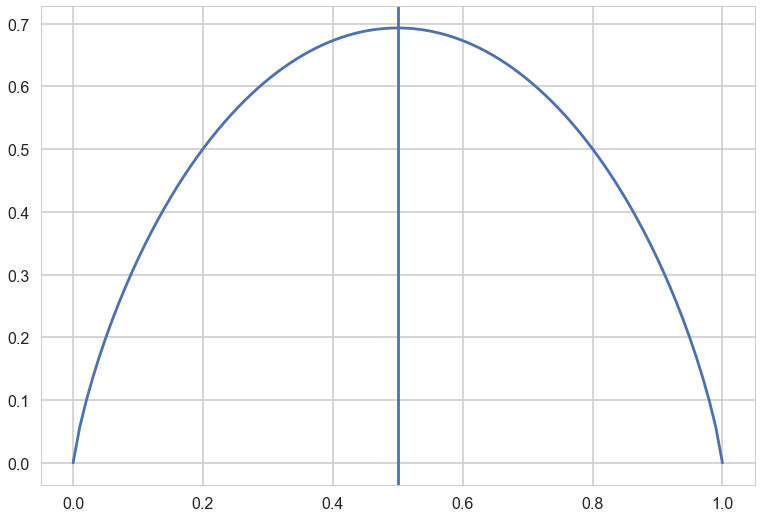

In [5]:
import math
p = np.linspace(0,1,100)
def h(p):
    if p==1.:
        ent = 0
    elif p==0.:
        ent = 0
    else:
        ent = - (p*math.log(p) + (1-p)* math.log(1-p))
    return ent
plt.plot(p, [h(pr) for pr in p]);
plt.axvline(0.5, 0, 1,'r');

Thus you can see there is maximal uncertainty at p=0.5.

## Maximum Entropy (maxent)

Maximum entropy is the notion of finding distributions consistent with constraints and the current state of our knowledge . In other words, what would be the distribution with hardest-to-guess outcomes? The one with the least additional assumptions?

We can maximize

$$H = -\sum_i p_i log(p_i)$$

in the case of the ball and bin model from thermodynamic entropy, by considering the langrange-multiplier enhanced, constraint enforcing entropy

$$H = -\sum_i p_i log(p_i) + \lambda \left( \sum_i p(x_i) - 1 \right)$$

$$\frac{\partial H}{\partial p_j} = 0 \implies -(1+log(p_j)) + \lambda = 0$$

This means that the $p_j$'s are all equal and thus must be $\frac{1}{M}$: thus the  distribution with all $p$s equal maximizes entropy.

Intuitively, with no other facts, it's hardest to guess which outcome occurs when all outcomes are equally likely.

### Normal as maxent for known mean, variance
Via the CLT the origin story for many gaussian distributions is that many small effects add up to produce them. It is exactly the "many" aspect of these that makes the gaussian a maxent distribution.

This is a plot from McElreath of a bunch of distributions with same mean and variance. The Gaussuan has the highest entropy, as we shall prove below.

![](images/gen_norm.png)

If you think about entropy increasing as we make a distribution flatter, you realize that the gaussian shape must come about because fixed, finite mean and variance puts a limit on how wide the distribution can be.

$$\renewcommand{kld}{D_{KL}}$$

For a gaussian

$$p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(x - \mu)^2/2\sigma^2}$$

$$H(p) = E_p[log(p)] = E_p[-\frac{1}{2}log(2\pi\sigma^2) - (x - \mu)^2/2\sigma^2]$$

$$ =  -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2\sigma^2}E_p[(x - \mu)^2] = -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2} = \frac{1}{2}log(2\pi e \sigma^2)$$

No other distribution $q$ can have higher entropy than this, provided they share the same variance and mean.

To see this consider (note change in order, we are considering $\kld(q, p)$:

$$\kld(q, p) = E_q[log(q/p)] = H(q,p) - H(q)$$

$$H(q,p) = E_q[log(p)] = E_q[-\frac{1}{2}log(2\pi\sigma^2) - (x - \mu)^2/2\sigma^2] \\= -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2\sigma^2}E_q[(x - \mu)^2]$$

The second expectation here is the variance $\sigma^2$ on the assumption that $E_q[x] = \mu$.

Thus

$$H(q,p) =  -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2} =  -\frac{1}{2}log(2\pi e \sigma^2) = H(p)$$

Now as we have shown $\kld(q,p) >=0$. This means that  $H(q,p) - H(q) >= 0$. Which then means that $H(p) - H(q) >= 0$ or $H(p) >= H(q)$. This means that the Gaussian has the highest entropy of any distribution with the same mean and variance.

See http://www.math.uconn.edu/~kconrad/blurbs/analysis/entropypost.pdf for details on maxent for distributions.

### Binomial (???) as Maxent

Information entropy increases as a probability distribution becomes more even. We saw that with the thermodynamic idea of entropy and the multinomial distribution.

Consider the situation when:

- only two outcomes (unordered) are possible.
- the process generating the outcomes is invariant in time, ie  the expected value remains constant (over temporal or other subsequences)

Then it turns out that  for these constraints, the maximum entropy distribution is the binomial.  The binomial basically spreads probability out as evenly and conservatively as possible, making sure that outcomes that have many more ways they can happen have more probability mass. Basically the binomial figures the number of ways any possible sequence of data can be realized, which is what entropy does. Thus it turns out that likelihoods derived by such counting turn out to be maximum entropy likelihoods.

$$H(q,p) >= H(q) \implies -E_q[log(p)] >= -E_q[log(q)]$$

For binomial parameter $\lambda/n$:

$$ H(q, p) = - \sum_i q_i log(p_i) = -\sum_i q_i \left(log \left(\frac{\lambda}{n}\right)^{x_i}  + log \left(\frac{n-\lambda}{n}\right)^{n - x_i} \right)$$

$$ =  - \sum_i q_i \left( x_i log\left(\frac{\lambda}{n}\right) + (n - x_i) log \left(\frac{n-\lambda}{n}\right)\right)$$

$$ =  - \sum_i q_i  \left( x_i log \left(\frac{\lambda}{n-\lambda}\right)  + n log \left(\frac{n-\lambda}{\lambda}\right) \right)$$

$$ H (q, p) =  - n log \left(\frac{n-\lambda}{\lambda}\right) -  log\left(\frac{\lambda}{n-\lambda}\right)E_q[x]$$

Now, if $E_q[x] = \lambda$, our invariant expectation, we have $H(q,p) = H(p)$ as we get the same formula if we substitute $q=p$ to get the entropy of the binomial. In other words, $H(p) >= H(q)$ and we have shown the binomial has maximum entropy amongst discrete distributions with two outcomes and fixed expectations.

## The importance of maxent

The most common distributions used as likelihoods (and priors) in modeling are those in the exponential family. The exponential family can be defined  as having pmf or pdf:

$$p(x|\theta) =  \frac{1}{Z(\theta)} h(x) e^{\theta^T\phi(x)}$$

Where $Z(\theta)$, also called the partition function, is the normalization.

For example, the univariate Gaussian Distribution can be obtained with:

$$
\begin{eqnarray}
\theta &=& \begin{pmatrix}\mu/\sigma^2 \\-1/2\sigma^2\end{pmatrix}\\
\phi(x) &=&  \begin{pmatrix}x \\x^2\end{pmatrix}\\
Z(\mu, \sigma^2) &=& \sigma\sqrt{2\pi} e^{\mu^2/2\sigma^2}\\
h(x) &=& 1
\end{eqnarray}
$$

Each member of the exponential family turns out to be a maximum entropy distribution subject to different constraints. These distributions are then used as likelihoods. 

![](images/expofamily.png)


For example, the gamma distribution, which we shall see later, is maximum entropy amongst all distributions with the same mean and same average logarithm. The poisson distribution, used for low event rates,  is maxent under similar conditions as the binomial as it is  a special case of the binomial. The exponential distribution is maxent among all non-negative continuous distributions with the same average inter-event displacement. (In our births example, the inter-birth time).

We'll talk more about these distributions when we encounter them, and when we talk about generalized linear models.

But here is the critical point. We will often choose a maximum entropy distribution as a likelihood . Information entropy ennumerates the number of ways a distribution can arise, after having fixed some assumptions. Thus, in choosing a MAXENT distribution as a likelihood, we choose a distribution that once the constraints has been met, does not contain any additional assumptions. It is thus the most conservative distribution we could choose consistent with our constraints.
